In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("./datos_seguro.csv")
df.head()

,edad,compra
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   edad    27 non-null     int64
 1   compra  27 non-null     int64
dtypes: int64(2)
memory usage: 564.0 bytes


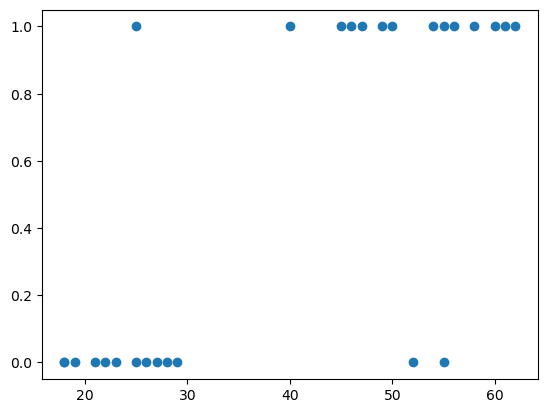

In [4]:
plt.scatter(
    df.edad, 
    df.compra
)
plt.show()

## 1. Separar la información que disponemos en un conjunto de datos para entrenamiento y uno para pruebas

In [21]:
X_entrena, X_prueba, y_entrena, y_prueba = train_test_split(df[["edad"]], df["compra"], train_size=0.9)

In [22]:
X_entrena

,edad
18,19
20,21
6,55
4,46
0,22
8,62
19,18
16,25
26,23
9,61


In [23]:
X_prueba

,edad
25,54
15,55
17,58


In [24]:
modelo = LogisticRegression()

In [25]:
modelo.fit(X_entrena, y_entrena)

LogisticRegression()

## 3. Evaluar el rendimiento del modelo

In [26]:
modelo.score(X_prueba, y_prueba)

1.0

In [27]:
datos_nuevos = pd.DataFrame({"edad": [54, 25, 58, 12]})
datos_nuevos

,edad
0,54
1,25
2,58
3,12


In [28]:
probabilidades = modelo.predict_proba(datos_nuevos)
probabilidades

array([[0.14149193, 0.85850807],
       [0.86304799, 0.13695201],
       [0.09066472, 0.90933528],
       [0.96994657, 0.03005343]])

In [29]:
prob_compra = probabilidades[:, 1]
prob_compra

array([0.85850807, 0.13695201, 0.90933528, 0.03005343])

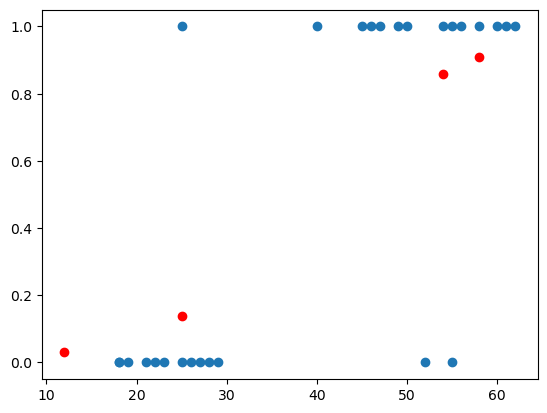

In [30]:
plt.scatter(
    df.edad, 
    df.compra
)
plt.scatter(
    datos_nuevos, 
    prob_compra,
    color="red"
)
plt.show()

### Ejercicios

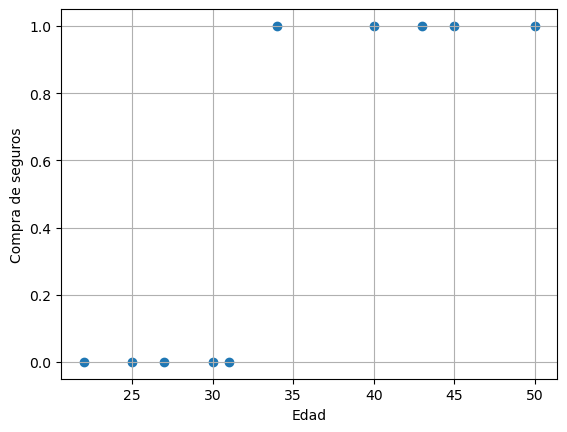

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

datos = {
    'edad': [25, 30, 45, 22, 34, 40, 27, 31, 43, 50],
    'salario': [50000, 54000, 72000, 42000, 62000, 68000, 49000, 56000, 76000, 90000],
    'compra': [0, 0, 1, 0, 1, 1, 0, 0, 1, 1]
}

df = pd.DataFrame(datos)

plt.scatter(
    df.edad, 
    df.compra
)
plt.xlabel("Edad")
plt.ylabel("Compra de seguros")
plt.grid(True)
plt.show()

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
    
datos = {
    'edad': [25, 30, 45, 22, 34, 40, 27, 31, 43, 50],
    'salario': [50000, 54000, 72000, 42000, 62000, 68000, 49000, 56000, 76000, 90000],
    'compra': [0, 0, 1, 0, 1, 1, 0, 0, 1, 1]
}
    
df = pd.DataFrame(datos)
    
X = df[['edad']]
y = df['compra']
    
X_entrena, X_prueba, y_entrena, y_prueba = train_test_split(X, y, train_size=0.9)
    
modelo = LogisticRegression()
modelo.fit(X_entrena, y_entrena)
    
modelo.score(X_entrena, y_entrena)

1.0

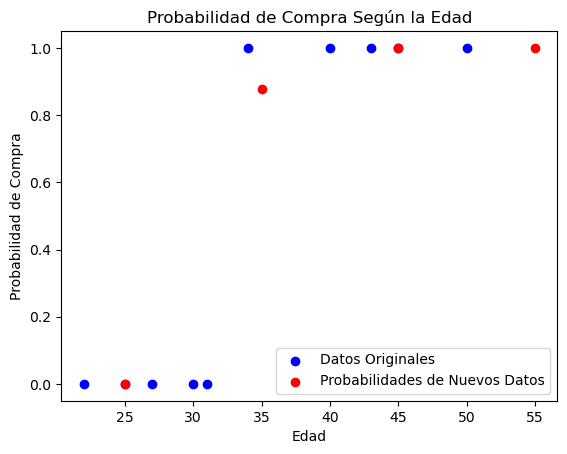

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
 
datos = {
    'edad': [25, 30, 45, 22, 34, 40, 27, 31, 43, 50],
    'salario': [50000, 54000, 72000, 42000, 62000, 68000, 49000, 56000, 76000, 90000],
    'compra': [0, 0, 1, 0, 1, 1, 0, 0, 1, 1]
}
 
df = pd.DataFrame(datos)
 
X = df[['edad']]
y = df['compra']
 
X_entrena, X_prueba, y_entrena, y_prueba = train_test_split(X, y, train_size=0.9, random_state=42)
 
modelo = LogisticRegression()
modelo.fit(X_entrena, y_entrena)  # Importante: entrenar el modelo
 
datos_nuevos = pd.DataFrame({
    'edad': [25, 35, 45, 55]
})
 
prob_compra = modelo.predict_proba(datos_nuevos)[:, 1]  # Toma solo la probabilidad de la clase 1 (compra)
 
# Gráfica de los datos originales
plt.scatter(df['edad'], df['compra'], color='blue', label='Datos Originales')
 
# Gráfica de las probabilidades de compra para los nuevos datos
plt.scatter(datos_nuevos['edad'], prob_compra, color='red', label='Probabilidades de Nuevos Datos')
 
# Añadir detalles al gráfico
plt.xlabel('Edad')
plt.ylabel('Probabilidad de Compra')
plt.title('Probabilidad de Compra Según la Edad')
plt.legend()
